In [2]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import tensorflow as tf
import tensorflow_addons as tfa

import seaborn as sns
import missingno as msno
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('seaborn-darkgrid')

df = pd.read_csv('House_prediction_dataset/train.csv')

C:\Users\malkhathery\AppData\Local\Temp\ipykernel_24792\742181245.py:13: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-darkgrid')


# 1.Data Exploration

#### Replace the NA (not applicable) value to Na, so it does not get interrperted as NaN value

In [3]:
df["Alley"] =  df["Alley"].fillna("Na")
df["MasVnrType"] =  df["MasVnrType"].fillna("Na")
df["BsmtQual"] =  df["BsmtQual"].fillna("Na")
df["BsmtCond"] =  df["BsmtCond"].fillna("Na")
df["BsmtExposure"] =  df["BsmtExposure"].fillna("Na")
df["BsmtFinType1"] =  df["BsmtFinType1"].fillna("Na")
df["BsmtFinType2"] =  df["BsmtFinType2"].fillna("Na")

df["FireplaceQu"] =  df["FireplaceQu"].fillna("Na")
df["GarageType"] =  df["GarageType"].fillna("Na")
df["GarageFinish"] =  df["GarageFinish"].fillna("Na")
df["GarageQual"] =  df["GarageQual"].fillna("Na")
df["GarageCond"] =  df["GarageCond"].fillna("Na")
df["PoolQC"] =  df["PoolQC"].fillna("Na")
df["Fence"] =  df["Fence"].fillna("Na")
df["MiscFeature"] =  df["MiscFeature"].fillna("Na")



#### Plot the non-null values percentage for all attributes 

<AxesSubplot: >

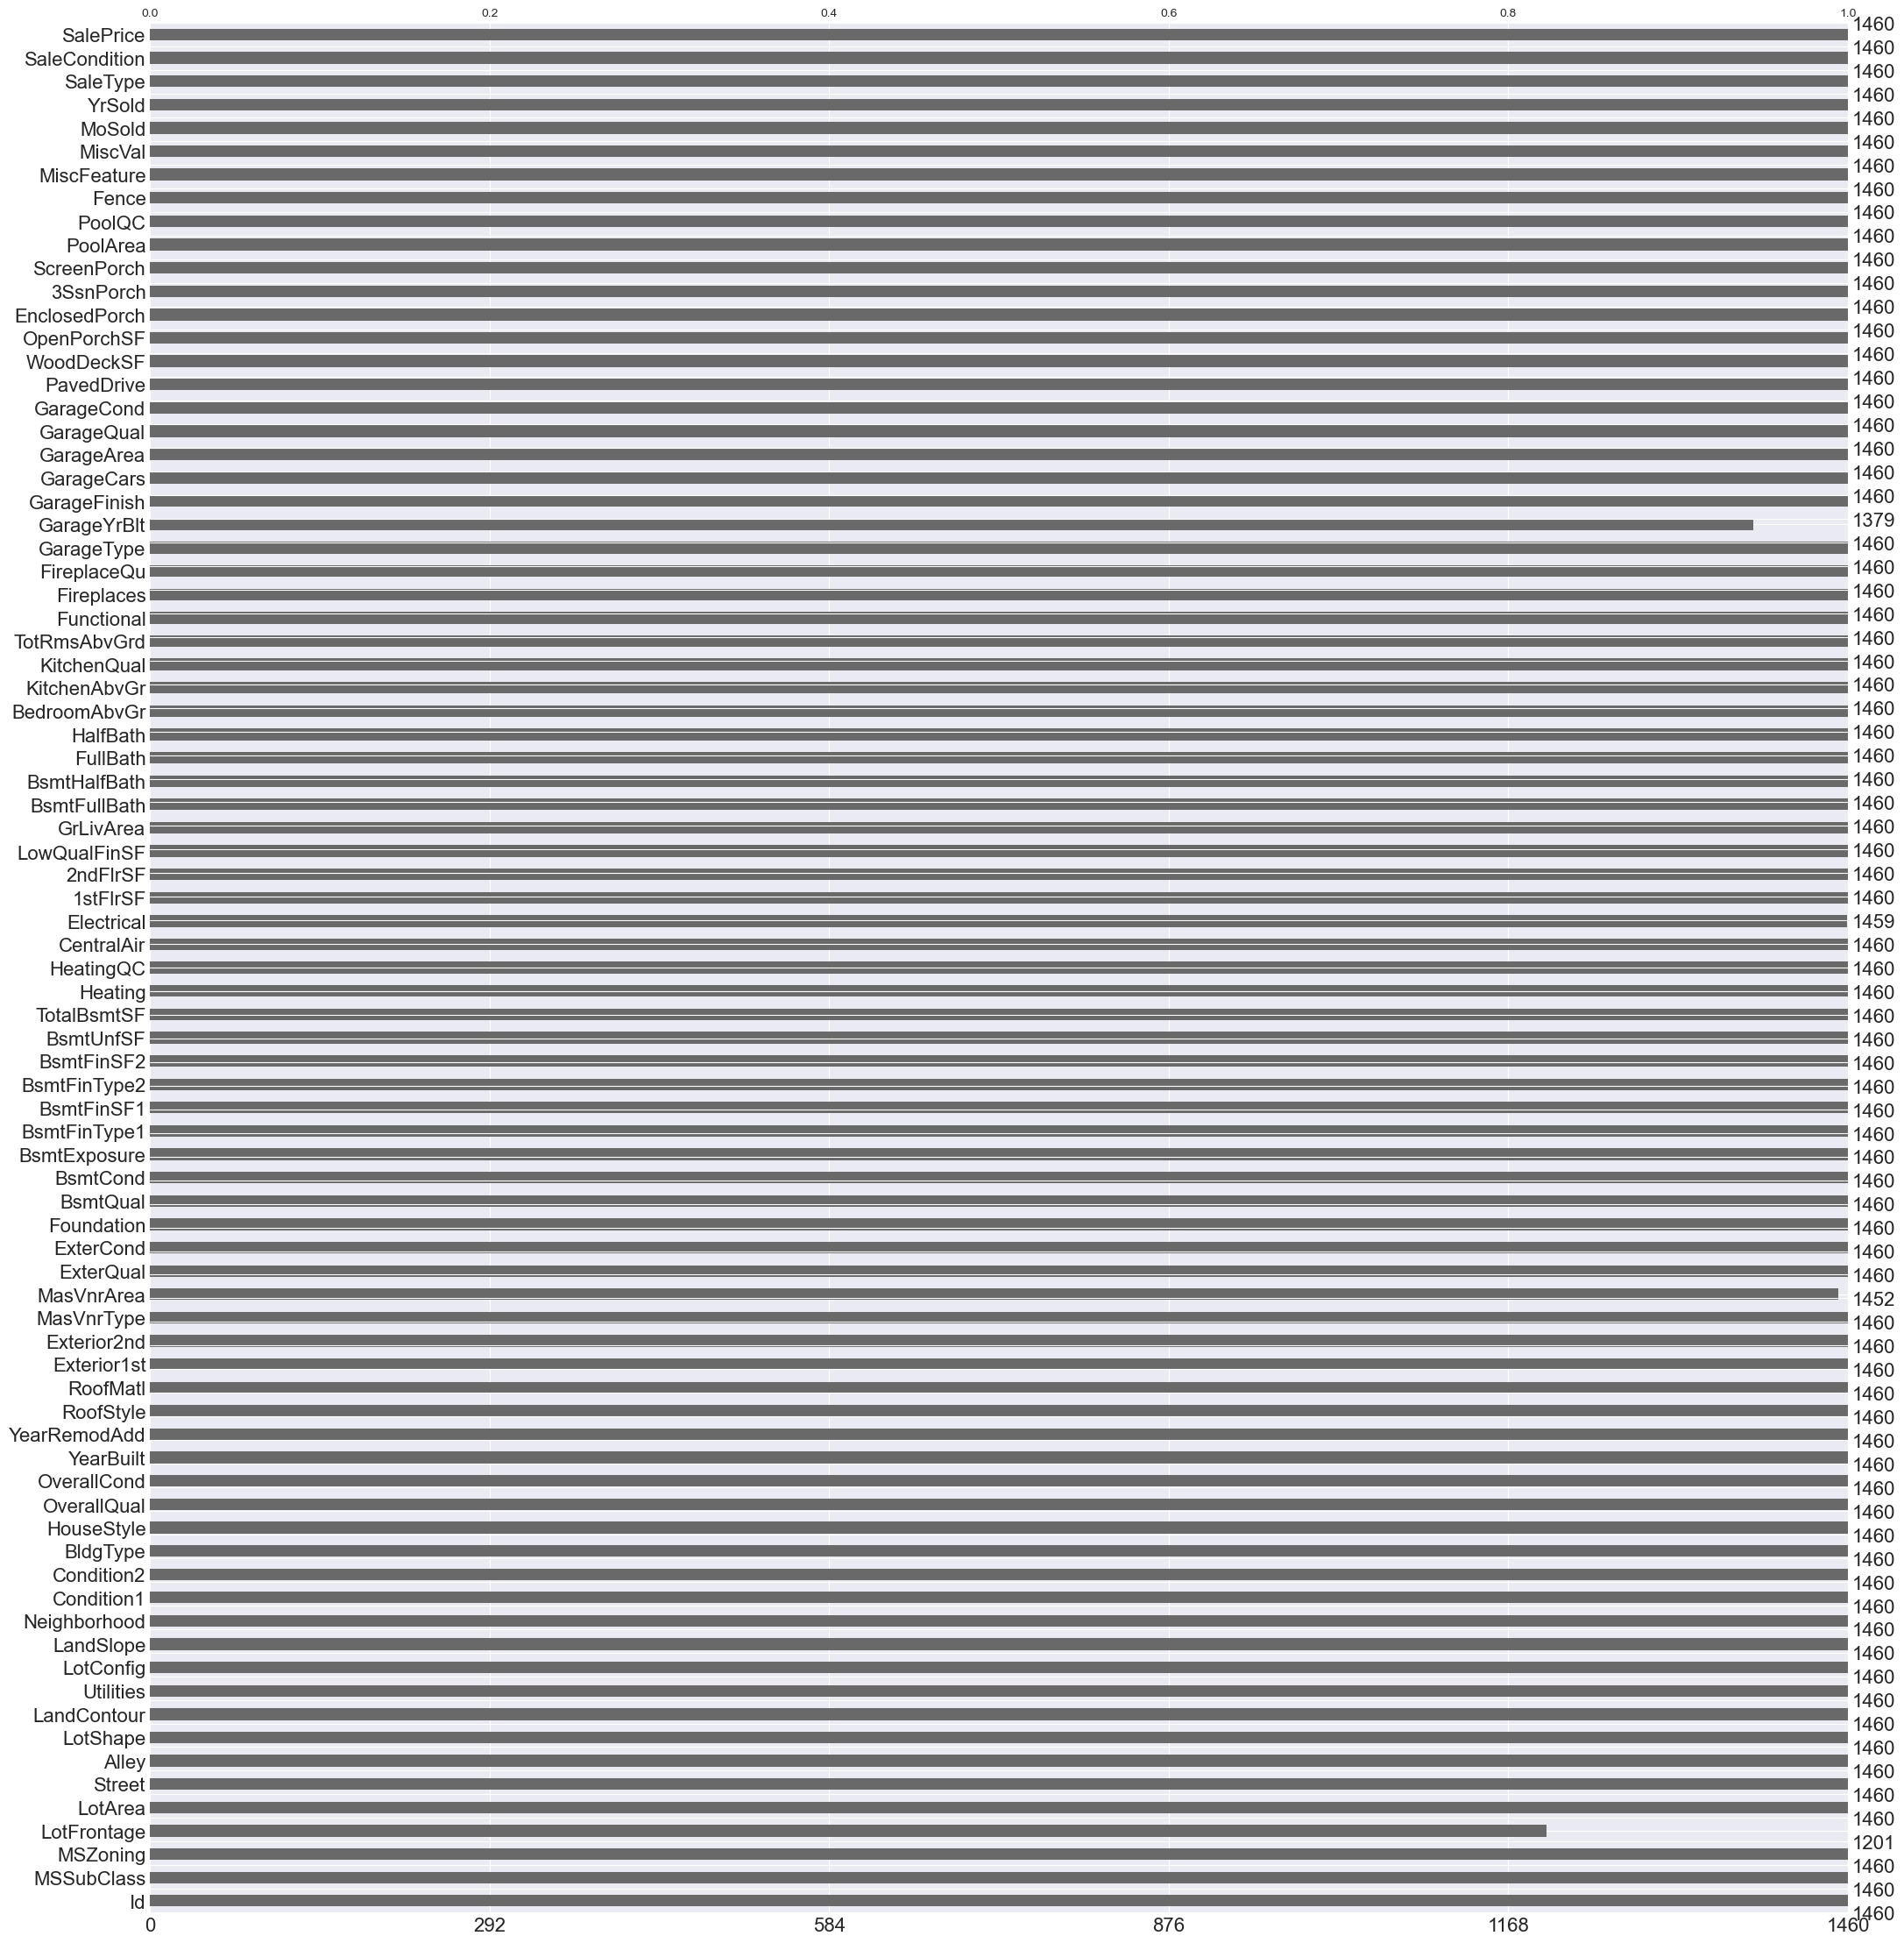

In [4]:
msno.bar(df)

In [5]:
# df = df.dropna()

In [6]:
GroupedData=df.groupby(by='MSZoning').size()
print(GroupedData)
GroupedData=df.groupby(by='Neighborhood').size()
print(GroupedData)
GroupedData=df.groupby(by='MiscFeature').size()
print(GroupedData)
GroupedData=df.groupby(by='CentralAir').size()
print(GroupedData)
GroupedData=df.groupby(by='RoofMatl').size()
print(GroupedData)
GroupedData=df.groupby(by='BsmtQual').size()
print(GroupedData)

MSZoning
C (all)      10
FV           65
RH           16
RL         1151
RM          218
dtype: int64
Neighborhood
Blmngtn     17
Blueste      2
BrDale      16
BrkSide     58
ClearCr     28
CollgCr    150
Crawfor     51
Edwards    100
Gilbert     79
IDOTRR      37
MeadowV     17
Mitchel     49
NAmes      225
NPkVill      9
NWAmes      73
NoRidge     41
NridgHt     77
OldTown    113
SWISU       25
Sawyer      74
SawyerW     59
Somerst     86
StoneBr     25
Timber      38
Veenker     11
dtype: int64
MiscFeature
Gar2       2
Na      1406
Othr       2
Shed      49
TenC       1
dtype: int64
CentralAir
N      95
Y    1365
dtype: int64
RoofMatl
ClyTile       1
CompShg    1434
Membran       1
Metal         1
Roll          1
Tar&Grv      11
WdShake       5
WdShngl       6
dtype: int64
BsmtQual
Ex    121
Fa     35
Gd    618
Na     37
TA    649
dtype: int64


In [7]:
df

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,Na,Reg,Lvl,AllPub,...,0,Na,Na,Na,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,Na,Reg,Lvl,AllPub,...,0,Na,Na,Na,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,Na,IR1,Lvl,AllPub,...,0,Na,Na,Na,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,Na,IR1,Lvl,AllPub,...,0,Na,Na,Na,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,Na,IR1,Lvl,AllPub,...,0,Na,Na,Na,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,62.0,7917,Pave,Na,Reg,Lvl,AllPub,...,0,Na,Na,Na,0,8,2007,WD,Normal,175000
1456,1457,20,RL,85.0,13175,Pave,Na,Reg,Lvl,AllPub,...,0,Na,MnPrv,Na,0,2,2010,WD,Normal,210000
1457,1458,70,RL,66.0,9042,Pave,Na,Reg,Lvl,AllPub,...,0,Na,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68.0,9717,Pave,Na,Reg,Lvl,AllPub,...,0,Na,Na,Na,0,4,2010,WD,Normal,142125


## Numerical attributes 

In [8]:
numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']
numeric = df.select_dtypes(include=numerics)

# ['Id','MSSubClass','OverallQual','OverallCond']
# They have numerical data type but they dont represent numerial value 
numeric = numeric.drop(columns=['Id','MSSubClass','OverallQual','OverallCond'])
numeric.head()

,LotFrontage,LotArea,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
0,65.0,8450,2003,2003,196.0,706,0,150,856,856,...,0,61,0,0,0,0,0,2,2008,208500
1,80.0,9600,1976,1976,0.0,978,0,284,1262,1262,...,298,0,0,0,0,0,0,5,2007,181500
2,68.0,11250,2001,2002,162.0,486,0,434,920,920,...,0,42,0,0,0,0,0,9,2008,223500
3,60.0,9550,1915,1970,0.0,216,0,540,756,961,...,0,35,272,0,0,0,0,2,2006,140000
4,84.0,14260,2000,2000,350.0,655,0,490,1145,1145,...,192,84,0,0,0,0,0,12,2008,250000


TotalBsmtSF    0.613581
1stFlrSF       0.605852
GrLivArea      0.708624
GarageCars     0.640409
GarageArea     0.623431
SalePrice      1.000000
Name: SalePrice, dtype: float64

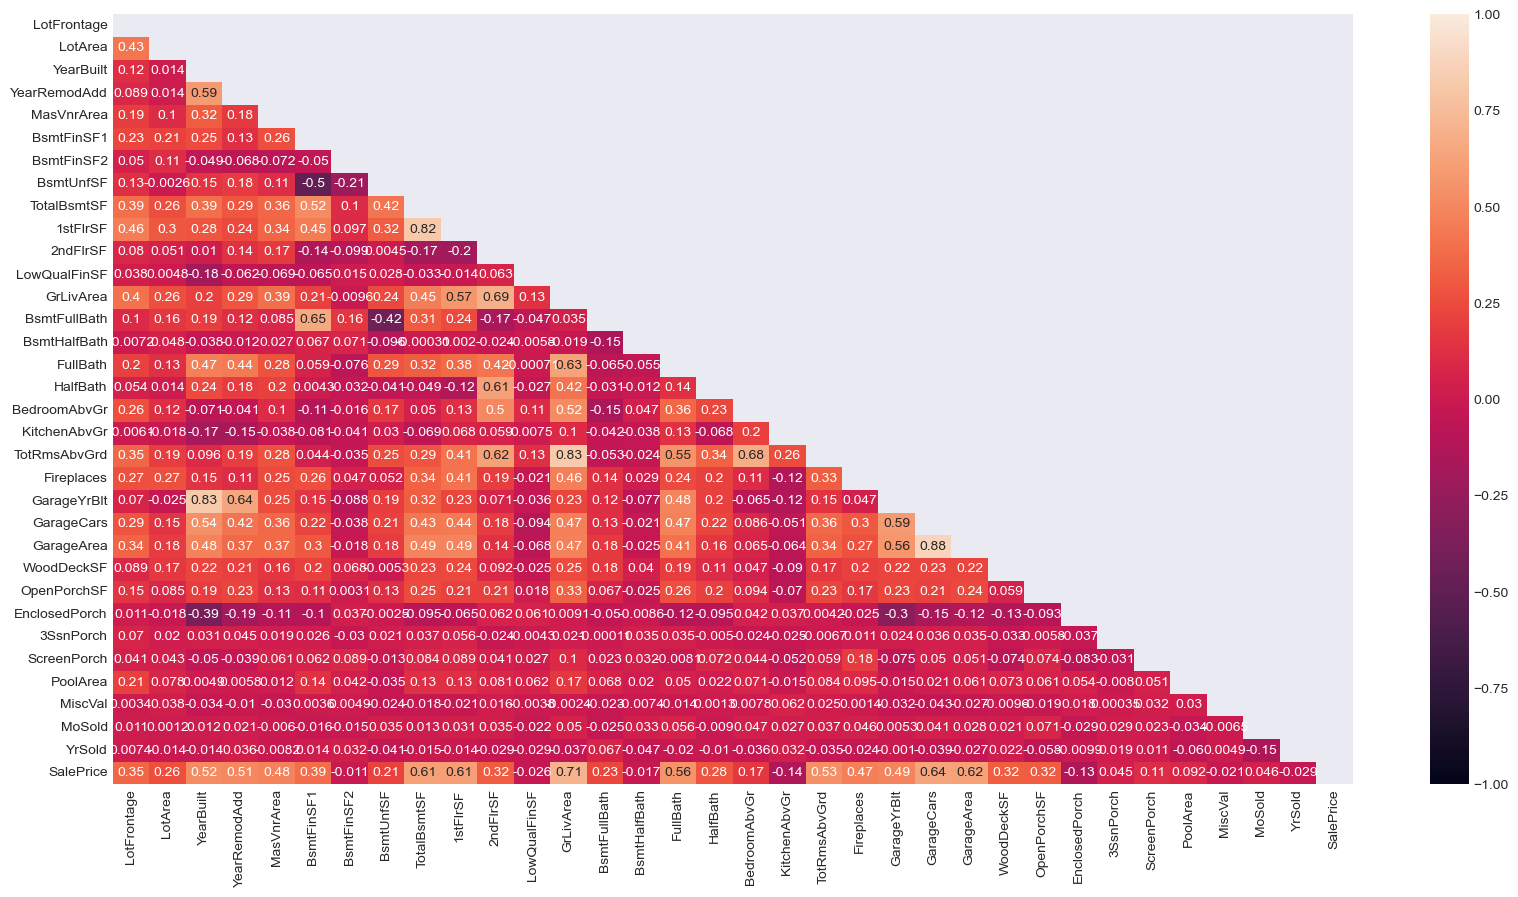

In [9]:
corr_num= numeric.corr()
matrix = np.triu(corr_num)

plt.figure(figsize=(20,10))
heatmap = sns.heatmap(corr_num, vmin=-1, 
                  vmax=1, annot=True,mask=matrix)
corr_num = corr_num.loc[(corr_num['SalePrice'] > 0.6) | (corr_num['SalePrice'] < -0.6)]
corr_num = corr_num['SalePrice']
corr_num

#### Select the highly correlated ones 

In [10]:
num = ["TotalBsmtSF","1stFlrSF","GrLivArea","GarageCars","GarageArea"]

## Ordinal attributes 

### Ordinal encoding

In [11]:
ordnial = df
enc = OrdinalEncoder(categories=[['Ex','Gd','TA','Fa','Po','Na']])

ordnial['ExterQual'] = enc.fit_transform(ordnial.loc[:,['ExterQual']])
ordnial['ExterCond'] = enc.fit_transform(ordnial.loc[:,['ExterCond']])
ordnial['BsmtQual'] = enc.fit_transform(ordnial.loc[:,['BsmtQual']])
ordnial['BsmtCond'] = enc.fit_transform(ordnial.loc[:,['BsmtCond']])
ordnial['HeatingQC'] = enc.fit_transform(ordnial.loc[:,['HeatingQC']])
ordnial['KitchenQual'] = enc.fit_transform(ordnial.loc[:,['KitchenQual']])
ordnial['GarageQual'] = enc.fit_transform(ordnial.loc[:,['GarageQual']])
ordnial['GarageCond'] = enc.fit_transform(ordnial.loc[:,['GarageCond']])
ordnial['FireplaceQu'] = enc.fit_transform(ordnial.loc[:,['FireplaceQu']])
ordnial['PoolQC'] = enc.fit_transform(ordnial.loc[:,['PoolQC']])


enc = OrdinalEncoder(categories=[['GLQ','ALQ','BLQ','Rec','LwQ','Unf','Na']])
ordnial['BsmtFinType1'] = enc.fit_transform(ordnial.loc[:,['BsmtFinType1']])
ordnial['BsmtFinType2'] = enc.fit_transform(ordnial.loc[:,['BsmtFinType2']])

enc = OrdinalEncoder(categories=[['Gd','Av','Mn','No','Na']])
ordnial['BsmtExposure'] = enc.fit_transform(ordnial.loc[:,['BsmtExposure']])

In [12]:
to_exclude = list(numeric.columns.values)
ordnial = df.drop(columns=to_exclude)

ordnial = ordnial.select_dtypes(include=numerics)
ordnial = ordnial.drop(columns=['Id','MSSubClass'])
ordnial["SalePrice"] = df['SalePrice']
ordnial.head()

,OverallQual,OverallCond,ExterQual,ExterCond,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,HeatingQC,KitchenQual,FireplaceQu,GarageQual,GarageCond,PoolQC,SalePrice
0,7,5,1.0,2.0,1.0,2.0,3.0,0.0,5.0,0.0,1.0,5.0,2.0,2.0,5.0,208500
1,6,8,2.0,2.0,1.0,2.0,0.0,1.0,5.0,0.0,2.0,2.0,2.0,2.0,5.0,181500
2,7,5,1.0,2.0,1.0,2.0,2.0,0.0,5.0,0.0,1.0,2.0,2.0,2.0,5.0,223500
3,7,5,2.0,2.0,2.0,1.0,3.0,1.0,5.0,1.0,1.0,1.0,2.0,2.0,5.0,140000
4,8,5,1.0,2.0,1.0,2.0,1.0,0.0,5.0,0.0,1.0,2.0,2.0,2.0,5.0,250000


OverallQual    0.809829
ExterQual     -0.684014
BsmtQual      -0.678026
KitchenQual   -0.672849
SalePrice      1.000000
Name: SalePrice, dtype: float64

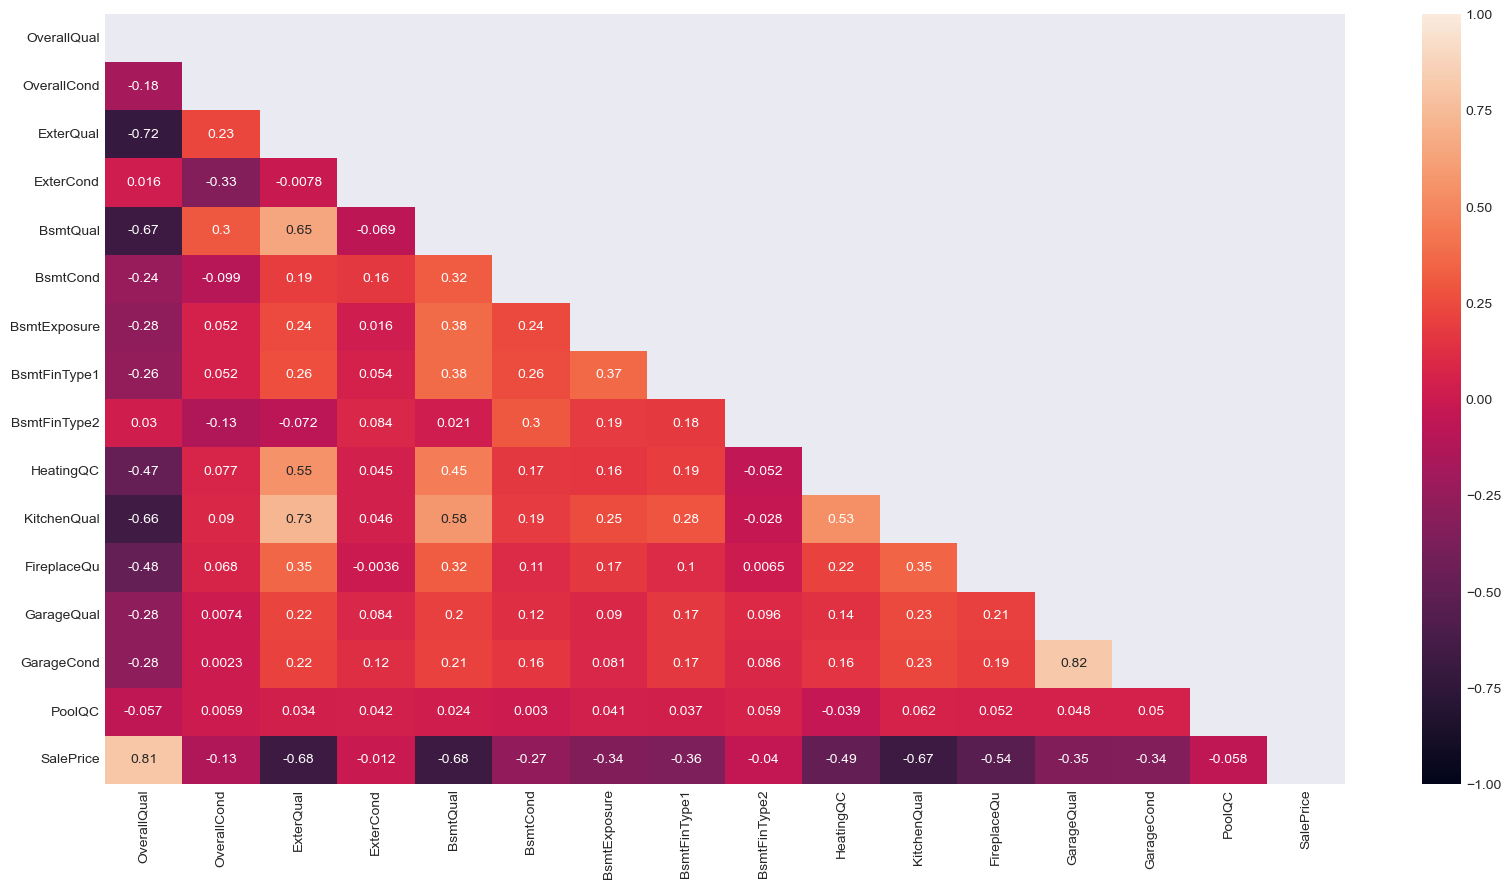

In [13]:
corr_ord= ordnial.corr(method='spearman')
matrix = np.triu(corr_ord)

plt.figure(figsize=(20,10))
heatmap = sns.heatmap(corr_ord, vmin=-1, 
                  vmax=1, annot=True,mask=matrix)
corr_ord = corr_ord.loc[(corr_ord['SalePrice'] > 0.6) | (corr_ord['SalePrice'] < -0.6)]
corr_ord = corr_ord['SalePrice']
corr_ord

#### Select the highly correlated data with the sales price 

In [14]:
od = ['OverallQual', 'ExterQual', 'BsmtQual', 'KitchenQual']

## Categorical attributes 

In [15]:
cat = df
to_exclude = list(numeric.columns.values)
tmp = list(ordnial.drop(columns=['SalePrice']).columns.values)
cat = cat.drop(columns=to_exclude)
cat = cat.drop(columns=tmp)
cat["SalePrice"] = df['SalePrice']


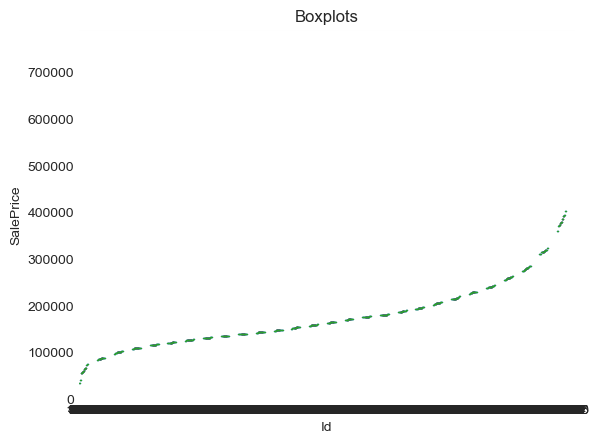

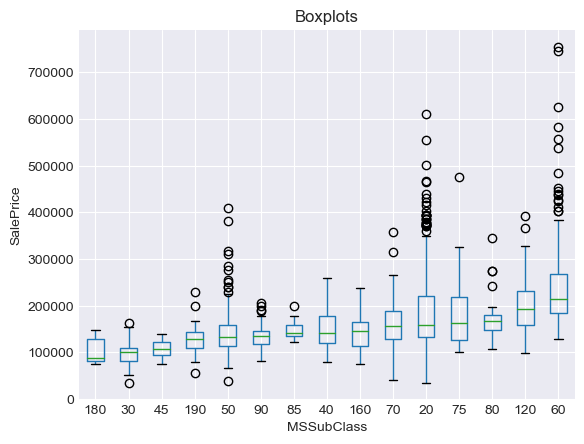

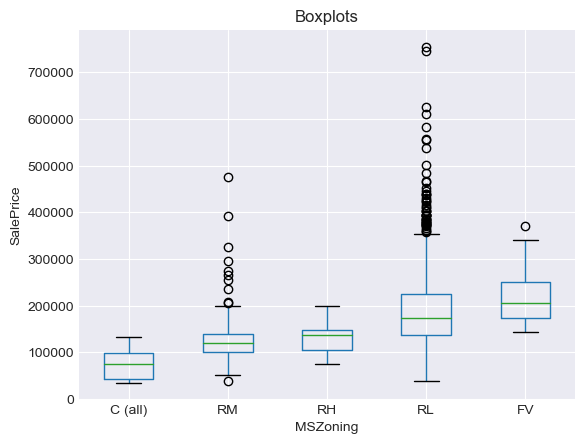

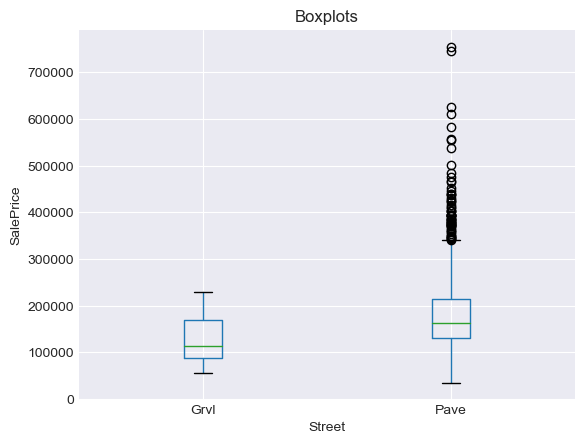

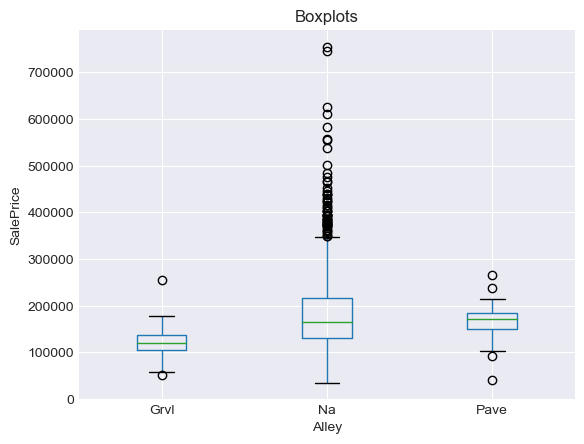

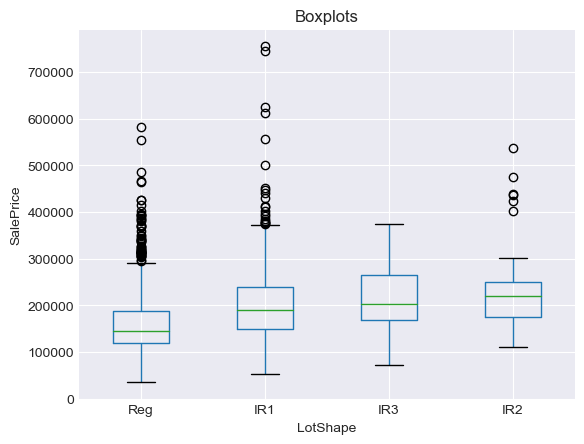

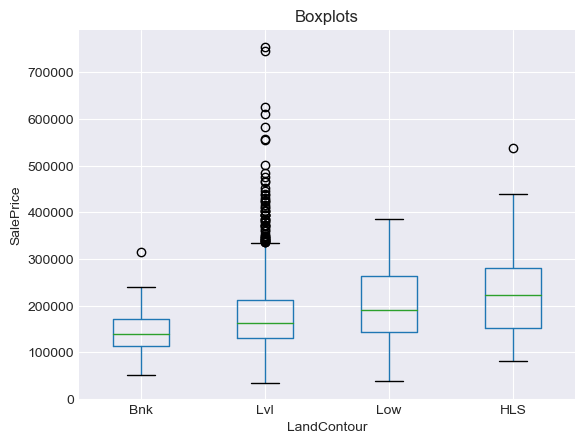

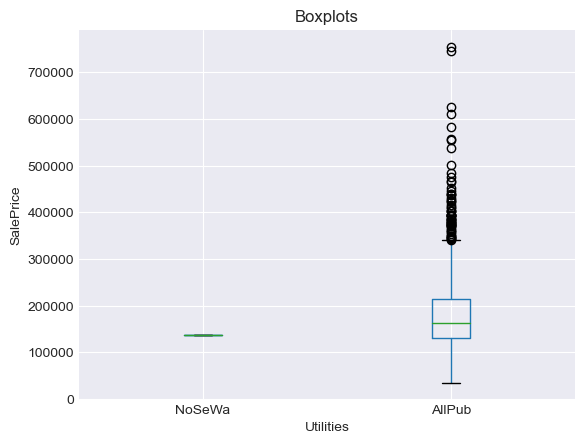

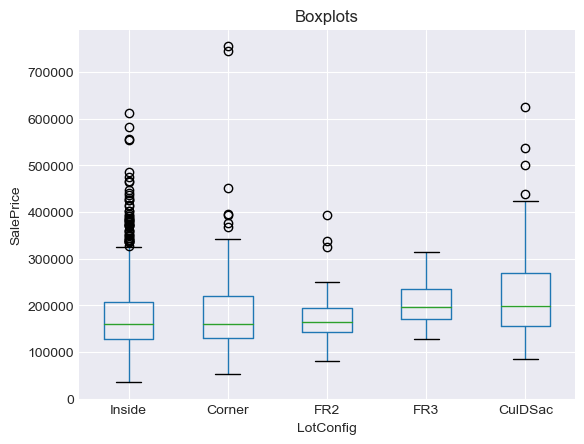

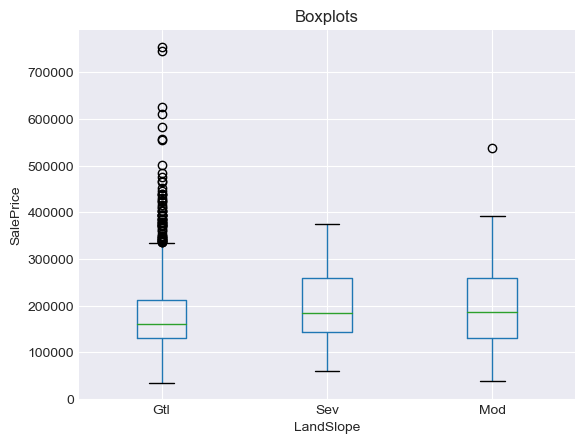

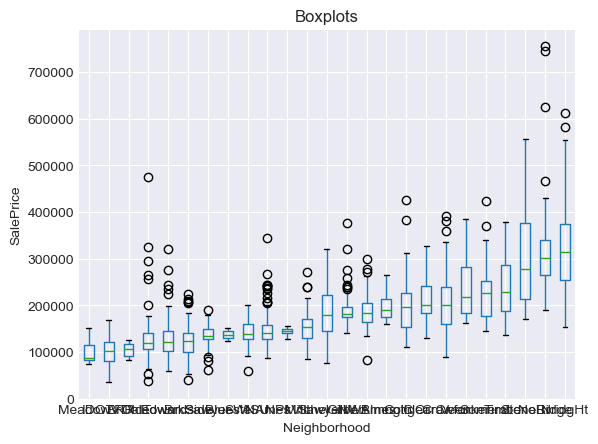

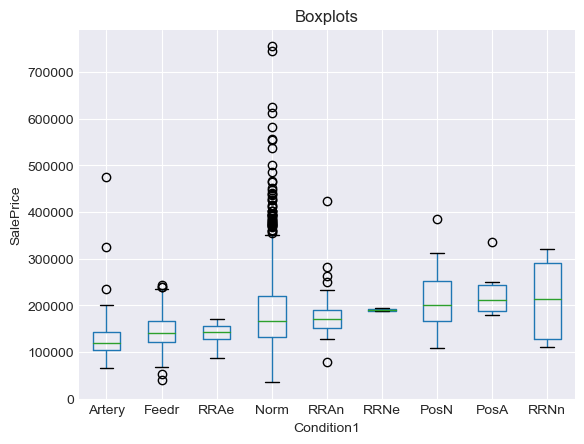

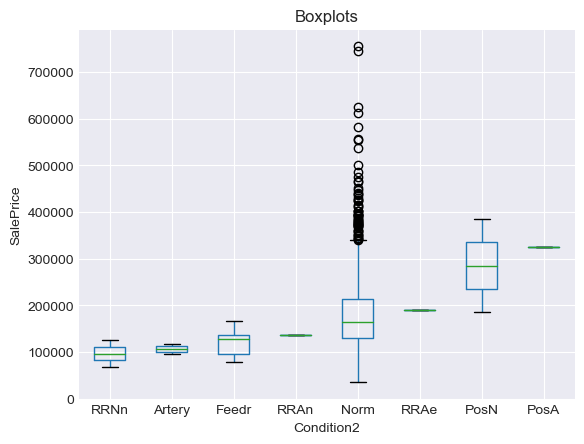

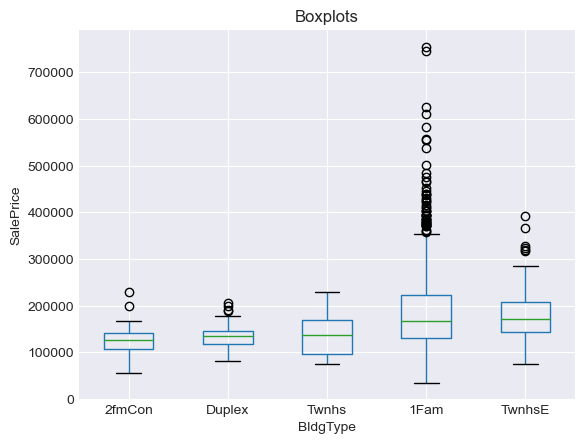

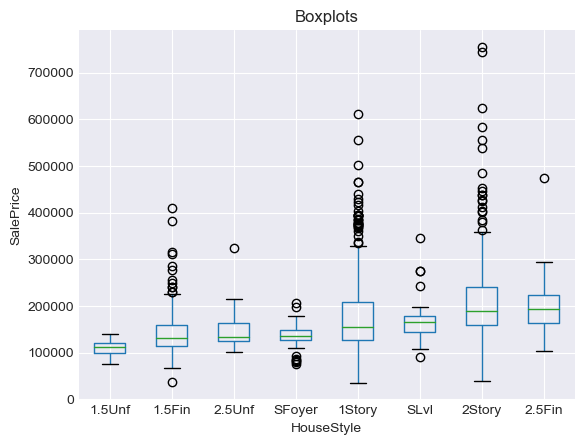

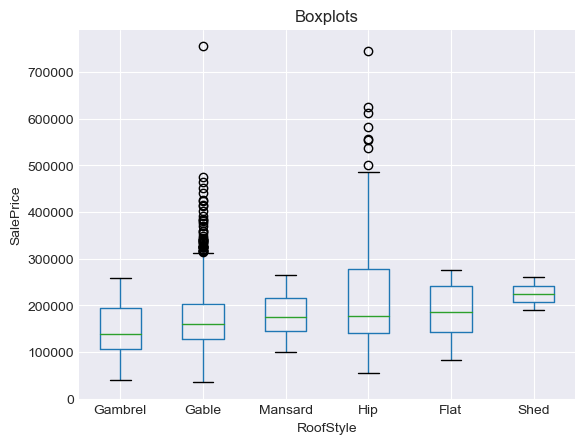

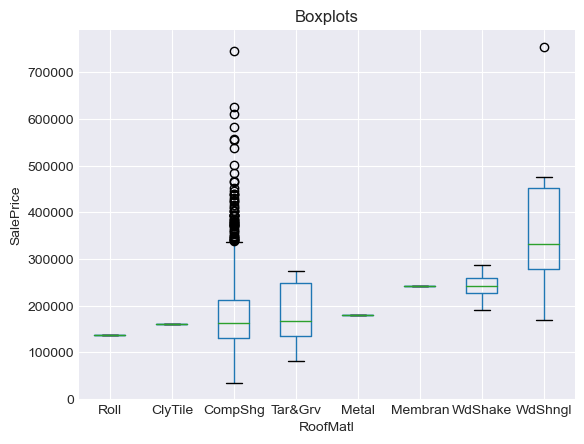

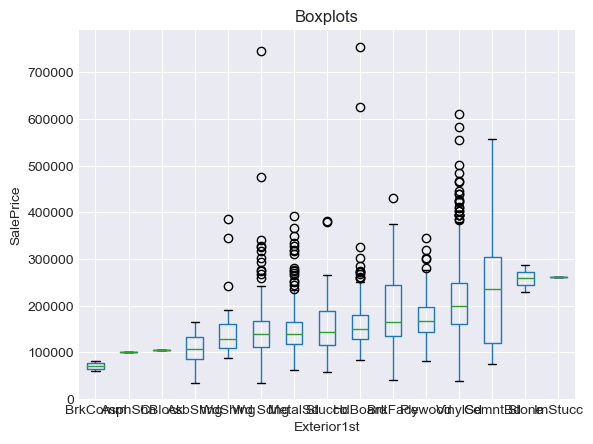

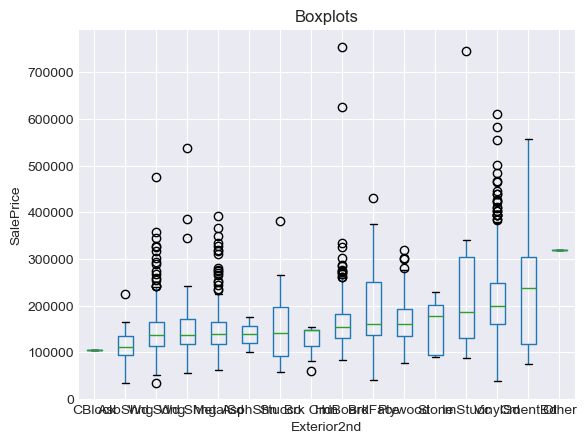

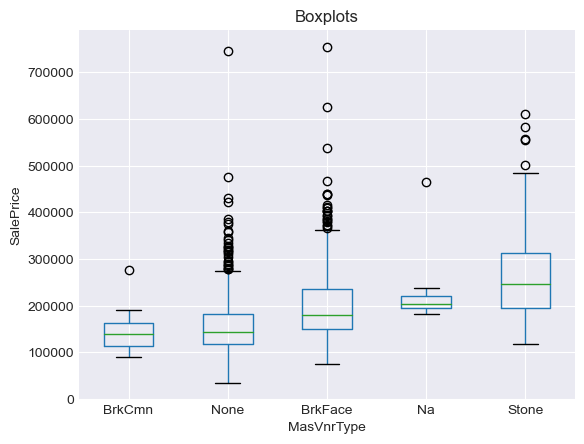

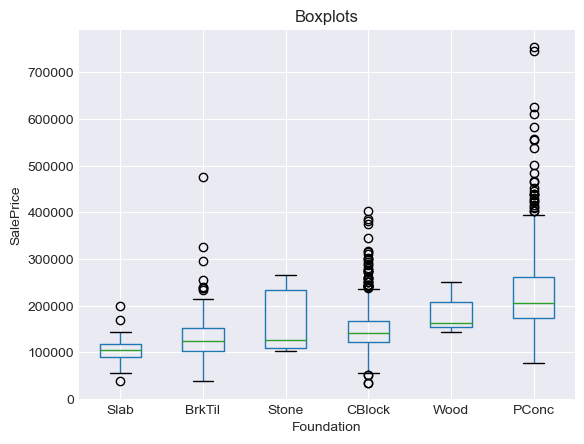

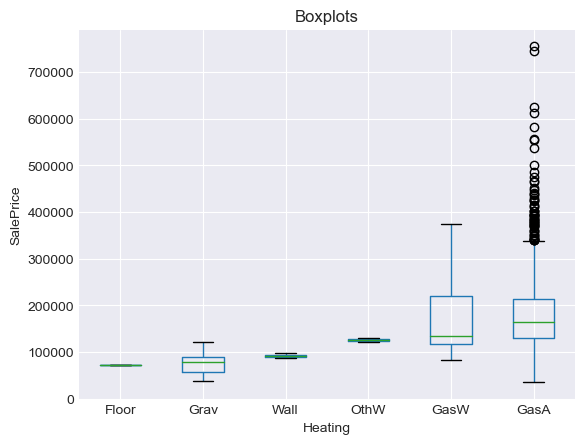

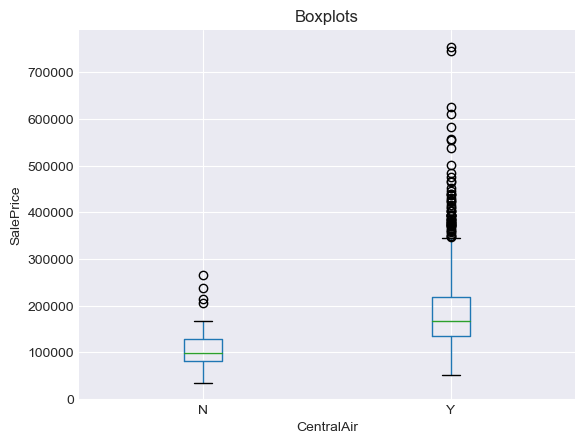

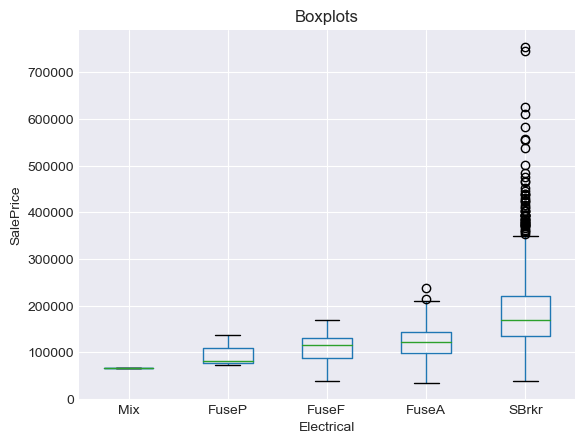

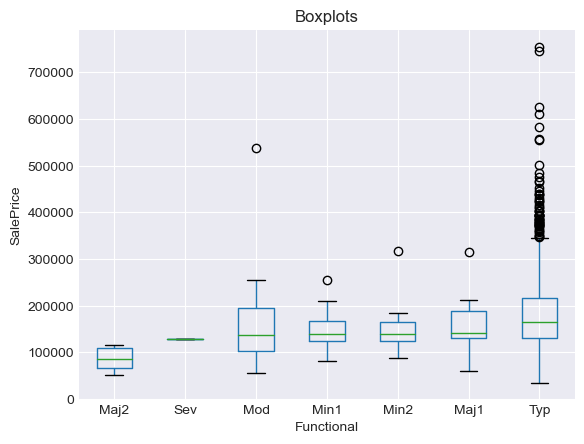

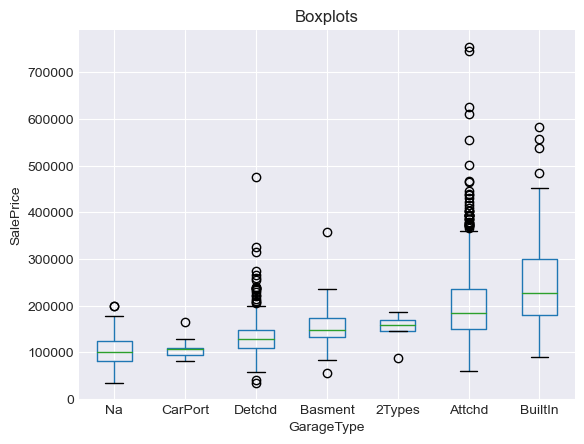

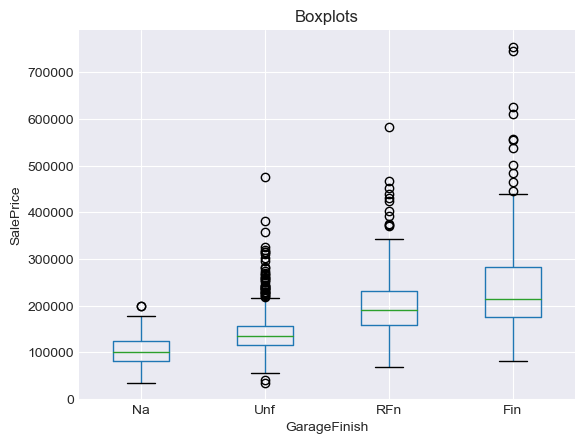

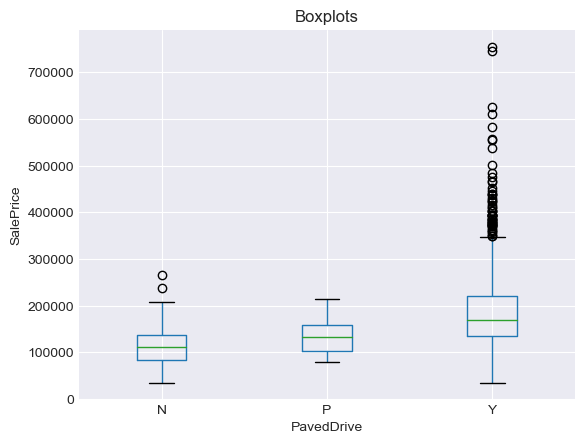

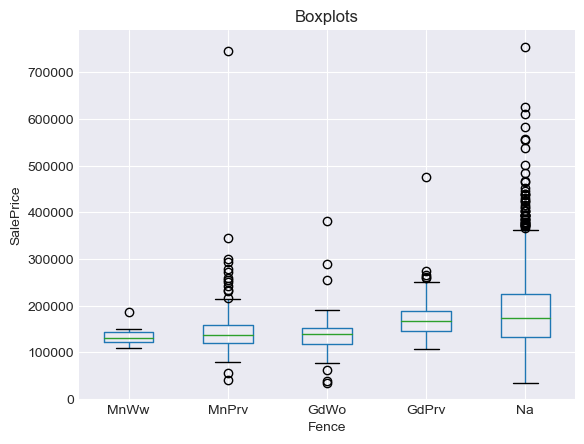

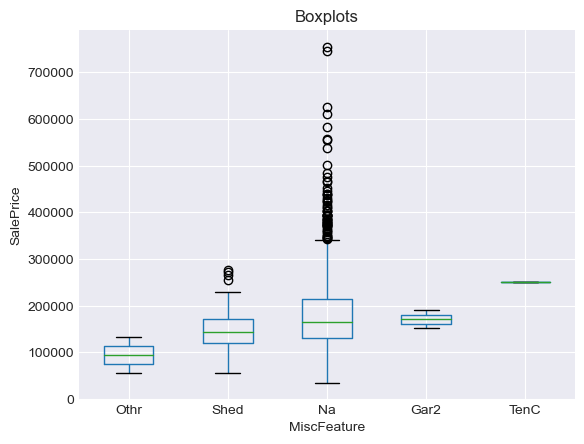

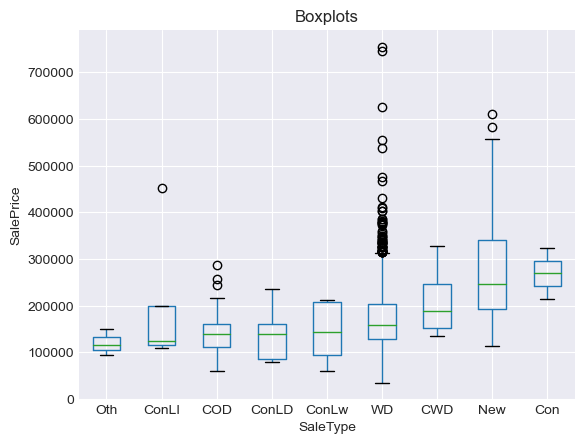

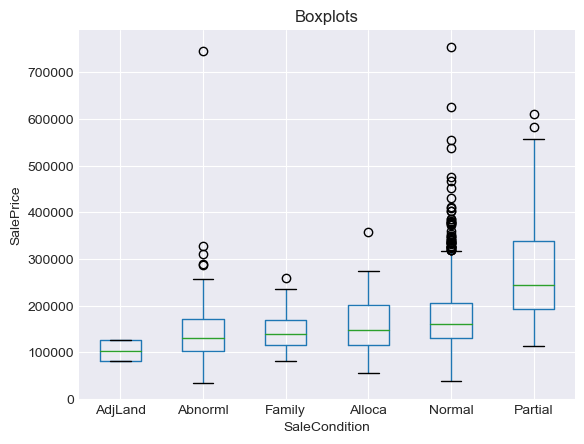

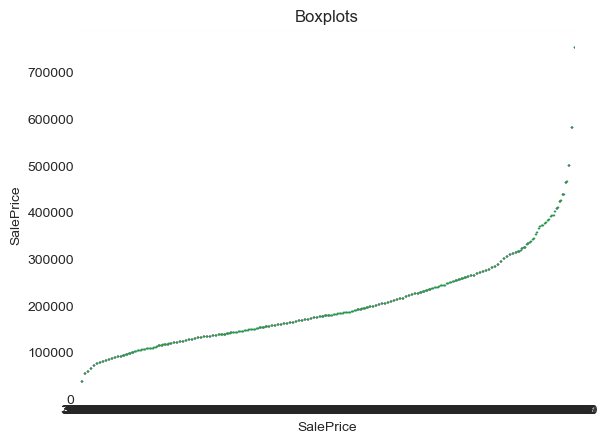

In [16]:
def boxplot_sorted(df, by, column, rot=0):

    df2 = pd.DataFrame({col:vals[column] for col, vals in df.groupby(by)})
    meds = df2.median().sort_values()

    return df2[meds.index].boxplot(rot=rot, return_type="axes")

for name, values in cat.iteritems():
    axes = boxplot_sorted(cat,  by=name, column='SalePrice', rot=0)
    plt.xlabel(name)
    plt.ylabel('SalePrice')
    plt.title('Boxplots')
    plt.show()

In [17]:
# ordnial = df
# enc = OrdinalEncoder(categories=[['Ex','Gd','TA','Fa','Po','Na']])

# ordnial['ExterQual'] = enc.fit_transform(ordnial.loc[:,['ExterQual']])
# ordnial['ExterCond'] = enc.fit_transform(ordnial.loc[:,['ExterCond']])
# ordnial['BsmtQual'] = enc.fit_transform(ordnial.loc[:,['BsmtQual']])
# ordnial['BsmtCond'] = enc.fit_transform(ordnial.loc[:,['BsmtCond']])
# ordnial['HeatingQC'] = enc.fit_transform(ordnial.loc[:,['HeatingQC']])
# ordnial['KitchenQual'] = enc.fit_transform(ordnial.loc[:,['KitchenQual']])
# ordnial['GarageQual'] = enc.fit_transform(ordnial.loc[:,['GarageQual']])
# ordnial['GarageCond'] = enc.fit_transform(ordnial.loc[:,['GarageCond']])
# ordnial['FireplaceQu'] = enc.fit_transform(ordnial.loc[:,['FireplaceQu']])
# ordnial['PoolQC'] = enc.fit_transform(ordnial.loc[:,['PoolQC']])


# enc = OrdinalEncoder(categories=[['GLQ','ALQ','BLQ','Rec','LwQ','Unf','Na']])
# ordnial['BsmtFinType1'] = enc.fit_transform(ordnial.loc[:,['BsmtFinType1']])
# ordnial['BsmtFinType2'] = enc.fit_transform(ordnial.loc[:,['BsmtFinType2']])

# enc = OrdinalEncoder(categories=[['Gd','Av','Mn','No','Na']])
# ordnial['BsmtExposure'] = enc.fit_transform(ordnial.loc[:,['BsmtExposure']])


#### Visaully select the attributes

In [18]:
attributes = []
attributes.extend(num)
attributes.extend(od)
attributes.extend(['MSZoning','Condition2'])
# 'MiscFeature','SalePrice' 'Neighborhood','CentralAir','RoofMatl','GarageFinish','Street',
len(attributes)

11

# ===========================================================


## 2.Preprocessing 

### After feature selection done, here are the selected attributes:


- 'TotalBsmtSF'  
- '1stFlrSF'
- 'GrLivArea' 
- 'GarageCars'
- 'GarageArea'
- 'OverallQual'
- 'ExterQual'
- 'BsmtQual'
- 'KitchenQual'
- 'MSZoning' 
- 'Condition2'
- 'SalePrice'


In [19]:
X = df.copy()
X = X[attributes]
Y = df['SalePrice']


In [20]:
X.isna().sum()

TotalBsmtSF    0
1stFlrSF       0
GrLivArea      0
GarageCars     0
GarageArea     0
OverallQual    0
ExterQual      0
BsmtQual       0
KitchenQual    0
MSZoning       0
Condition2     0
dtype: int64

### Standerization of the numerical attributes 

In [21]:
scaler = StandardScaler()
X[num] = scaler.fit_transform(X[num])


In [22]:
X

,TotalBsmtSF,1stFlrSF,GrLivArea,GarageCars,GarageArea,OverallQual,ExterQual,BsmtQual,KitchenQual,MSZoning,Condition2
0,-0.459303,-0.793434,0.370333,0.311725,0.351000,7,1.0,1.0,1.0,RL,Norm
1,0.466465,0.257140,-0.482512,0.311725,-0.060731,6,2.0,1.0,2.0,RL,Norm
2,-0.313369,-0.627826,0.515013,0.311725,0.631726,7,1.0,1.0,1.0,RL,Norm
3,-0.687324,-0.521734,0.383659,1.650307,0.790804,7,2.0,2.0,1.0,RL,Norm
4,0.199680,-0.045611,1.299326,1.650307,1.698485,8,1.0,1.0,1.0,RL,Norm
...,...,...,...,...,...,...,...,...,...,...,...
1455,-0.238122,-0.542435,0.250402,0.311725,-0.060731,6,2.0,1.0,2.0,RL,Norm
1456,1.104925,2.355701,1.061367,0.311725,0.126420,6,2.0,1.0,2.0,RL,Norm
1457,0.215641,0.065656,1.569647,-1.026858,-1.033914,7,0.0,2.0,1.0,RL,Norm
1458,0.046905,-0.218982,-0.832788,-1.026858,-1.090059,5,2.0,2.0,1.0,RL,Norm


### One-hot encoding for the categorical attributes

In [23]:
X = pd.get_dummies(data=X, drop_first=True)


In [24]:
X

,TotalBsmtSF,1stFlrSF,GrLivArea,GarageCars,GarageArea,OverallQual,ExterQual,BsmtQual,KitchenQual,MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,Condition2_Feedr,Condition2_Norm,Condition2_PosA,Condition2_PosN,Condition2_RRAe,Condition2_RRAn,Condition2_RRNn
0,-0.459303,-0.793434,0.370333,0.311725,0.351000,7,1.0,1.0,1.0,0,0,1,0,0,1,0,0,0,0,0
1,0.466465,0.257140,-0.482512,0.311725,-0.060731,6,2.0,1.0,2.0,0,0,1,0,0,1,0,0,0,0,0
2,-0.313369,-0.627826,0.515013,0.311725,0.631726,7,1.0,1.0,1.0,0,0,1,0,0,1,0,0,0,0,0
3,-0.687324,-0.521734,0.383659,1.650307,0.790804,7,2.0,2.0,1.0,0,0,1,0,0,1,0,0,0,0,0
4,0.199680,-0.045611,1.299326,1.650307,1.698485,8,1.0,1.0,1.0,0,0,1,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,-0.238122,-0.542435,0.250402,0.311725,-0.060731,6,2.0,1.0,2.0,0,0,1,0,0,1,0,0,0,0,0
1456,1.104925,2.355701,1.061367,0.311725,0.126420,6,2.0,1.0,2.0,0,0,1,0,0,1,0,0,0,0,0
1457,0.215641,0.065656,1.569647,-1.026858,-1.033914,7,0.0,2.0,1.0,0,0,1,0,0,1,0,0,0,0,0
1458,0.046905,-0.218982,-0.832788,-1.026858,-1.090059,5,2.0,2.0,1.0,0,0,1,0,0,1,0,0,0,0,0


#### Split the data 

In [25]:
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=4)

In [26]:
output_size = 1
X_train_ten = tf.convert_to_tensor(x_train)
Y_train_ten = tf.convert_to_tensor(y_train)
X_test_ten = tf.convert_to_tensor(x_test)
Y_test_ten = tf.convert_to_tensor(y_test)

# --- Main changes start here ---
# --- Two experiment  were conducted ---
## 1. Train/Test split form the traing batch
## 2. Train from train set, Test from test set
## * 6/2/2023 *


## 3.Training 

In [27]:
models = tf.keras.Sequential(
                            [
                             tf.keras.layers.Dense(32,activation='relu'),
                             tf.keras.layers.Dense(16,activation='relu'),
                                
#                              tf.keras.layers.Dropout(rate = 0.1),
                             tf.keras.layers.Dense(1)  
                            ])
custom_optimizer=tf.keras.optimizers.Adam(learning_rate=0.01)
models.compile(optimizer=custom_optimizer,loss='mse', metrics=[tf.keras.metrics.RootMeanSquaredError(name='rmse'),'mae'])
models.fit(X_train_ten,Y_train_ten,epochs=200,verbose=1)

Epoch 1/200
37/37 [==============================] - 0s 878us/step - loss: 39239053312.0000 - rmse: 198088.5000 - mae: 180955.5625
Epoch 2/200
37/37 [==============================] - 0s 833us/step - loss: 38849503232.0000 - rmse: 197102.7656 - mae: 179923.7188
Epoch 3/200
37/37 [==============================] - 0s 916us/step - loss: 36643897344.0000 - rmse: 191425.9531 - mae: 174124.5156
Epoch 4/200
37/37 [==============================] - 0s 834us/step - loss: 30738929664.0000 - rmse: 175325.2188 - mae: 157460.5469
Epoch 5/200
37/37 [==============================] - 0s 972us/step - loss: 20941488128.0000 - rmse: 144711.7344 - mae: 125021.0312
Epoch 6/200
37/37 [==============================] - 0s 834us/step - loss: 10528069632.0000 - rmse: 102606.3828 - mae: 79475.4688
Epoch 7/200
37/37 [==============================] - 0s 861us/step - loss: 4516029440.0000 - rmse: 67201.4062 - mae: 44515.0117
Epoch 8/200
37/37 [==============================] - 0s 834us/step - loss: 3093574912.0

37/37 [==============================] - 0s 722us/step - loss: 1372146944.0000 - rmse: 37042.5000 - mae: 22878.7383
Epoch 65/200
37/37 [==============================] - 0s 778us/step - loss: 1358646528.0000 - rmse: 36859.8242 - mae: 22936.5879
Epoch 66/200
37/37 [==============================] - 0s 750us/step - loss: 1352764416.0000 - rmse: 36779.9453 - mae: 22746.3926
Epoch 67/200
37/37 [==============================] - 0s 722us/step - loss: 1349294592.0000 - rmse: 36732.7461 - mae: 22777.0586
Epoch 68/200
37/37 [==============================] - 0s 750us/step - loss: 1345419520.0000 - rmse: 36679.9609 - mae: 22770.9590
Epoch 69/200
37/37 [==============================] - 0s 722us/step - loss: 1343032448.0000 - rmse: 36647.4062 - mae: 22646.2695
Epoch 70/200
37/37 [==============================] - 0s 750us/step - loss: 1334667520.0000 - rmse: 36533.1016 - mae: 22629.9785
Epoch 71/200
37/37 [==============================] - 0s 806us/step - loss: 1336665728.0000 - rmse: 36560.4375

37/37 [==============================] - 0s 750us/step - loss: 1221285632.0000 - rmse: 34946.8984 - mae: 21521.1875
Epoch 128/200
37/37 [==============================] - 0s 750us/step - loss: 1212417408.0000 - rmse: 34819.7852 - mae: 21438.5762
Epoch 129/200
37/37 [==============================] - 0s 722us/step - loss: 1214127488.0000 - rmse: 34844.3320 - mae: 21388.5117
Epoch 130/200
37/37 [==============================] - 0s 750us/step - loss: 1226290048.0000 - rmse: 35018.4258 - mae: 21850.9824
Epoch 131/200
37/37 [==============================] - 0s 750us/step - loss: 1211152384.0000 - rmse: 34801.6133 - mae: 21437.1211
Epoch 132/200
37/37 [==============================] - 0s 722us/step - loss: 1207062272.0000 - rmse: 34742.8008 - mae: 21408.8984
Epoch 133/200
37/37 [==============================] - 0s 722us/step - loss: 1206675072.0000 - rmse: 34737.2305 - mae: 21359.9414
Epoch 134/200
37/37 [==============================] - 0s 695us/step - loss: 1206975744.0000 - rmse: 347

37/37 [==============================] - 0s 756us/step - loss: 1152765184.0000 - rmse: 33952.3945 - mae: 20668.0098
Epoch 191/200
37/37 [==============================] - 0s 721us/step - loss: 1154413568.0000 - rmse: 33976.6602 - mae: 20722.1895
Epoch 192/200
37/37 [==============================] - 0s 722us/step - loss: 1154128512.0000 - rmse: 33972.4688 - mae: 20740.5938
Epoch 193/200
37/37 [==============================] - 0s 694us/step - loss: 1174501760.0000 - rmse: 34271.0039 - mae: 20963.8438
Epoch 194/200
37/37 [==============================] - 0s 724us/step - loss: 1147864960.0000 - rmse: 33880.1562 - mae: 20707.3047
Epoch 195/200
37/37 [==============================] - 0s 777us/step - loss: 1160200704.0000 - rmse: 34061.7188 - mae: 20803.6250
Epoch 196/200
37/37 [==============================] - 0s 750us/step - loss: 1148876672.0000 - rmse: 33895.0820 - mae: 20713.0449
Epoch 197/200
37/37 [==============================] - 0s 778us/step - loss: 1159912960.0000 - rmse: 340

In [28]:
y_train_pred = models.predict(X_train_ten)

37/37 [==============================] - 0s 816us/step


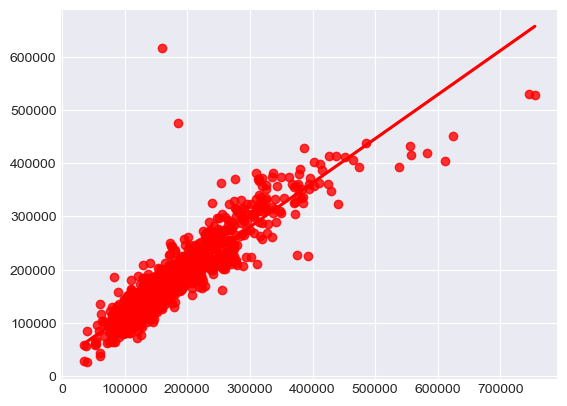

In [29]:
sns.regplot(x=Y_train_ten,y=y_train_pred,ci=None,color ='red');

## R^2 for the train split:

In [30]:
Y_train_ten.shape

TensorShape([1168])

In [31]:
Y_train_ten = tf.reshape(Y_train_ten, [1168,1])
metric = tfa.metrics.r_square.RSquare()
metric.update_state(Y_train_ten, y_train_pred)
result = metric.result()
result.numpy()

0.8244209

## 4.Evaluation 

In [32]:
models.evaluate(X_test_ten,Y_test_ten)

10/10 [==============================] - 0s 1ms/step - loss: 816652800.0000 - rmse: 28577.1387 - mae: 20038.4863


[816652800.0, 28577.138671875, 20038.486328125]

In [33]:
y_test_pred = models.predict(X_test_ten)

10/10 [==============================] - 0s 890us/step


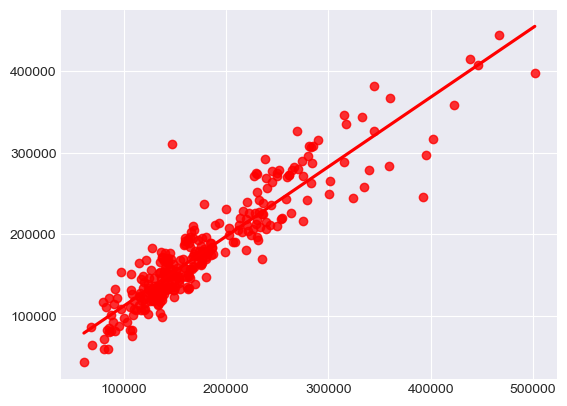

In [34]:
sns.regplot(x=Y_test_ten,y=y_test_pred,ci=None,color ='red');

## R^2 for the testing split:

In [35]:
Y_test_ten.shape

TensorShape([292])

In [36]:

Y_test_ten = tf.reshape(Y_test_ten, [292,1])
metric = tfa.metrics.r_square.RSquare()
metric.update_state(Y_test_ten, y_test_pred)
result = metric.result()
result.numpy()

0.85290873

# =============================================


# Using the supplied test set for testing

## preprocessing 

In [39]:
df_test = pd.read_csv('House_prediction_dataset/test.csv')
X_test = df_test[attributes]

Y_test = pd.read_csv('House_prediction_dataset/sample_submission.csv')
Y_test = Y_test['SalePrice']

In [40]:
# standerization
X_test[num] = scaler.transform(X_test[num])

# ordinal encoding 
X_test[od] = X_test[od].fillna('NA')
enc = OrdinalEncoder(categories=[['Ex','Gd','TA','Fa','Po','NA']])

X_test['ExterQual'] = enc.fit_transform(X_test.loc[:,['ExterQual']])
X_test['BsmtQual'] = enc.fit_transform(X_test.loc[:,['BsmtQual']])
X_test['KitchenQual'] = enc.fit_transform(X_test.loc[:,['KitchenQual']])

# one-hot encoding
X_test = pd.get_dummies(data=X_test, drop_first=True)
X, X_test = X.align(X_test, join='left', axis=1)
X_test = X_test.fillna(int(0))


C:\Users\malkhathery\AppData\Local\Temp\ipykernel_24792\2498647857.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test[num] = scaler.transform(X_test[num])
C:\Users\malkhathery\AppData\Local\Temp\ipykernel_24792\2498647857.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test[od] = X_test[od].fillna('NA')
C:\Users\malkhathery\AppData\Local\Temp\ipykernel_24792\2498647857.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,c

In [41]:
X_train_ten = tf.convert_to_tensor(X)
Y_train_ten = tf.convert_to_tensor(Y)
X_test_ten = tf.convert_to_tensor(X_test)
Y_test_ten = tf.convert_to_tensor(Y_test)

## Training

In [42]:
# training 
models = tf.keras.Sequential(
                            [
                             tf.keras.layers.Dense(32,activation='relu'),
                             tf.keras.layers.Dense(16,activation='relu'),
                                
#                              tf.keras.layers.Dropout(rate = 0.1),
                             tf.keras.layers.Dense(1)  
                            ])
custom_optimizer=tf.keras.optimizers.Adam(learning_rate=0.01)
models.compile(optimizer=custom_optimizer,loss='mse', metrics=[tf.keras.metrics.RootMeanSquaredError(name='rmse'),'mae'])
models.fit(X_train_ten,Y_train_ten,epochs=200,verbose=1)

Epoch 1/200
46/46 [==============================] - 0s 822us/step - loss: 38978097152.0000 - rmse: 197428.7188 - mae: 180760.2656
Epoch 2/200
46/46 [==============================] - 0s 867us/step - loss: 37770334208.0000 - rmse: 194345.9062 - mae: 177616.9688
Epoch 3/200
46/46 [==============================] - 0s 822us/step - loss: 32204929024.0000 - rmse: 179457.3125 - mae: 161933.5156
Epoch 4/200
46/46 [==============================] - 0s 911us/step - loss: 20187408384.0000 - rmse: 142082.4062 - mae: 122343.0703
Epoch 5/200
46/46 [==============================] - 0s 956us/step - loss: 7988055552.0000 - rmse: 89375.9219 - mae: 65001.2695
Epoch 6/200
46/46 [==============================] - 0s 760us/step - loss: 3376060160.0000 - rmse: 58103.8750 - mae: 38604.9297
Epoch 7/200
46/46 [==============================] - 0s 844us/step - loss: 2763744000.0000 - rmse: 52571.3242 - mae: 35911.3438
Epoch 8/200
46/46 [==============================] - 0s 867us/step - loss: 2521749760.0000 -

46/46 [==============================] - 0s 734us/step - loss: 1344899328.0000 - rmse: 36672.8672 - mae: 23572.7891
Epoch 65/200
46/46 [==============================] - 0s 733us/step - loss: 1337709312.0000 - rmse: 36574.7070 - mae: 23749.5801
Epoch 66/200
46/46 [==============================] - 0s 741us/step - loss: 1337071744.0000 - rmse: 36565.9922 - mae: 23520.1270
Epoch 67/200
46/46 [==============================] - 0s 733us/step - loss: 1332387328.0000 - rmse: 36501.8828 - mae: 23679.3047
Epoch 68/200
46/46 [==============================] - 0s 756us/step - loss: 1334770304.0000 - rmse: 36534.5078 - mae: 23512.7617
Epoch 69/200
46/46 [==============================] - 0s 715us/step - loss: 1324288256.0000 - rmse: 36390.7734 - mae: 23568.5078
Epoch 70/200
46/46 [==============================] - 0s 756us/step - loss: 1323706752.0000 - rmse: 36382.7812 - mae: 23369.1289
Epoch 71/200
46/46 [==============================] - 0s 778us/step - loss: 1320667520.0000 - rmse: 36340.9883

46/46 [==============================] - 0s 732us/step - loss: 1136176768.0000 - rmse: 33707.2227 - mae: 20888.4297
Epoch 128/200
46/46 [==============================] - 0s 711us/step - loss: 1129510016.0000 - rmse: 33608.1836 - mae: 20791.9980
Epoch 129/200
46/46 [==============================] - 0s 711us/step - loss: 1130799232.0000 - rmse: 33627.3594 - mae: 20862.0566
Epoch 130/200
46/46 [==============================] - 0s 756us/step - loss: 1121186048.0000 - rmse: 33484.1172 - mae: 20720.9707
Epoch 131/200
46/46 [==============================] - 0s 689us/step - loss: 1130584832.0000 - rmse: 33624.1719 - mae: 20954.3672
Epoch 132/200
46/46 [==============================] - 0s 844us/step - loss: 1121248640.0000 - rmse: 33485.0508 - mae: 20643.4824
Epoch 133/200
46/46 [==============================] - 0s 733us/step - loss: 1119337344.0000 - rmse: 33456.5000 - mae: 20761.6816
Epoch 134/200
46/46 [==============================] - 0s 756us/step - loss: 1124066432.0000 - rmse: 335

46/46 [==============================] - 0s 737us/step - loss: 1069090112.0000 - rmse: 32696.9434 - mae: 20099.4551
Epoch 191/200
46/46 [==============================] - 0s 733us/step - loss: 1071691968.0000 - rmse: 32736.7070 - mae: 20106.2832
Epoch 192/200
46/46 [==============================] - 0s 711us/step - loss: 1075658496.0000 - rmse: 32797.2344 - mae: 20062.2031
Epoch 193/200
46/46 [==============================] - 0s 733us/step - loss: 1076768640.0000 - rmse: 32814.1523 - mae: 20221.3496
Epoch 194/200
46/46 [==============================] - 0s 711us/step - loss: 1079287424.0000 - rmse: 32852.5117 - mae: 20146.8438
Epoch 195/200
46/46 [==============================] - 0s 667us/step - loss: 1069854464.0000 - rmse: 32708.6289 - mae: 20179.8926
Epoch 196/200
46/46 [==============================] - 0s 711us/step - loss: 1067177920.0000 - rmse: 32667.6895 - mae: 20105.5566
Epoch 197/200
46/46 [==============================] - 0s 711us/step - loss: 1066019712.0000 - rmse: 326

In [50]:
y_train_pred = models.predict(X_train_ten)

46/46 [==============================] - 0s 648us/step


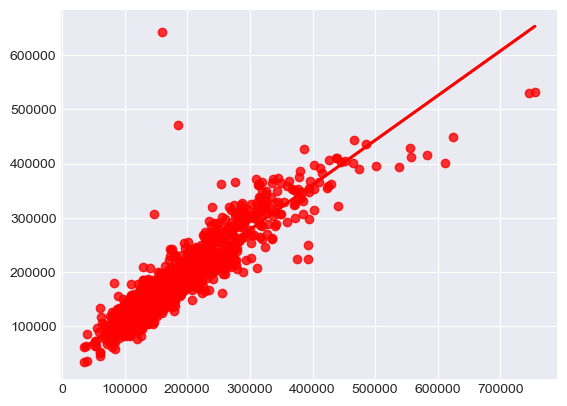

In [51]:
sns.regplot(x=Y_train_ten,y=y_train_pred,ci=None,color ='red');

In [52]:
Y_train_ten.shape

TensorShape([1460])

In [53]:
Y_train_ten = tf.reshape(Y_train_ten, [1460,1])
metric = tfa.metrics.r_square.RSquare()
metric.update_state(Y_train_ten, y_train_pred)
result = metric.result()
result.numpy()

0.8319894

## Evaluation

In [45]:
models.evaluate(X_test_ten,Y_test_ten)

46/46 [==============================] - 0s 688us/step - loss: 4993659904.0000 - rmse: 70665.8359 - mae: 54685.3203


[4993659904.0, 70665.8359375, 54685.3203125]

In [46]:
y_test_pred = models.predict(X_test_ten)

46/46 [==============================] - 0s 680us/step


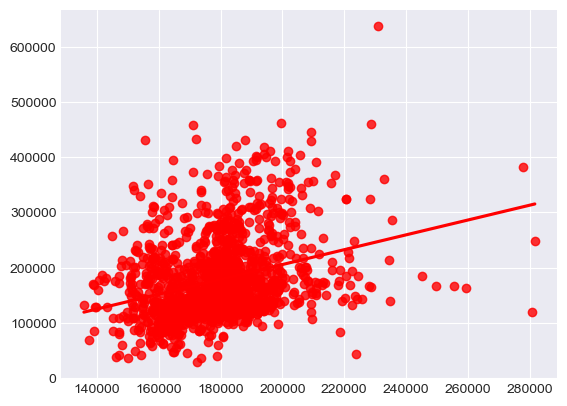

In [47]:
sns.regplot(x=Y_test_ten,y=y_test_pred,ci=None,color ='red');

## R^2 for testing split

In [48]:
Y_test_ten.shape

TensorShape([1459])

In [49]:
Y_test_ten = tf.reshape(Y_test_ten, [1459,1])
metric = tfa.metrics.r_square.RSquare()
metric.update_state(Y_test_ten, y_test_pred)
result = metric.result()
result.numpy()

-17.313929

# ================== ENDS HERE! ======================